In [1]:
from scipy.sparse.csgraph import connected_components
import numpy as np
import csv
import matplotlib.pyplot as plt
import statistics
from numpy import linalg as LA

# Graph A is the Stochastic Block Model

Reformatting the matrices to a list representation

In [2]:
row_matrix = []
with open('A.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        row_matrix.append(row)
        
m = row_matrix[0][0].split(',')

num_rows = len(row_matrix)
num_cols = len(m)

#print(type(m[0]))

adj_matrix = []
for i in range(num_rows) :
    m = row_matrix[i][0].split(',')
    temp = []
    for j in range(num_cols) :
        temp.append(int(m[j]))
    adj_matrix.append(temp)
    
#print(len(adj_matrix[1]))

Display the Largest and Second Largest Eigenvalue

In [8]:
w, v = LA.eig(np.array(adj_matrix))
print(np.sort(w))

[-1.13835608e+01 -1.08015654e+01 -1.04190121e+01 -1.03146432e+01
 -9.96896160e+00 -9.87961325e+00 -9.64569857e+00 -9.56868226e+00
 -9.42186218e+00 -9.17372233e+00 -8.94205141e+00 -8.90501216e+00
 -8.75550372e+00 -8.59651840e+00 -8.55662531e+00 -8.35581999e+00
 -8.19858697e+00 -8.18210360e+00 -7.83866526e+00 -7.76569764e+00
 -7.65171169e+00 -7.54760881e+00 -7.50518008e+00 -7.48095580e+00
 -7.18046870e+00 -7.04895037e+00 -6.92652010e+00 -6.90527522e+00
 -6.81938224e+00 -6.61760346e+00 -6.50370994e+00 -6.46738269e+00
 -6.36830189e+00 -6.27428081e+00 -6.09710660e+00 -5.99737717e+00
 -5.92707376e+00 -5.74602099e+00 -5.70564071e+00 -5.57744310e+00
 -5.45072205e+00 -5.29873089e+00 -5.21303788e+00 -5.11686055e+00
 -5.02875287e+00 -4.91349112e+00 -4.83443699e+00 -4.66903901e+00
 -4.64175997e+00 -4.45721304e+00 -4.39080182e+00 -4.25332936e+00
 -4.22244148e+00 -4.13193136e+00 -4.09539425e+00 -3.98755197e+00
 -3.92053549e+00 -3.76860545e+00 -3.76371662e+00 -3.61643614e+00
 -3.47838263e+00 -3.36119

Notice for Stochastic Block Model that we need further analysis to verify it's identity.

In [102]:
print(connected_components(np.asarray(adj_matrix)))

(1, array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32))


Use a degree matrix and data analysis to determine the identity

In [103]:
degree_matrix = []
for i in range(num_rows) :
    m = row_matrix[i][0].split(',')
    temp = 0
    for j in range(num_cols) :
        temp = temp + int(m[j])
    degree_matrix.append(temp)

print(degree_matrix)
print('Average Degree')
print(sum(degree_matrix) / len(degree_matrix))
print('Maximum Degree') 
print(max(degree_matrix))
print('Minimum Degree')
print(min(degree_matrix))
print('IQR')
q3, q1 = np.percentile(degree_matrix, [75 ,25])
print(q3 - q1)
print('Standard Deviation')
print(statistics.pstdev(degree_matrix))

[45, 39, 37, 36, 42, 46, 42, 39, 35, 59, 31, 40, 41, 42, 48, 35, 31, 46, 44, 39, 47, 46, 44, 29, 50, 44, 35, 43, 37, 39, 37, 45, 42, 36, 38, 44, 37, 46, 58, 38, 39, 53, 38, 41, 56, 35, 41, 45, 43, 40, 61, 33, 36, 41, 35, 43, 44, 32, 32, 47, 45, 48, 48, 49, 48, 36, 43, 42, 36, 42, 33, 45, 34, 39, 51, 43, 47, 37, 37, 44, 32, 42, 42, 37, 51, 33, 43, 36, 47, 39, 53, 39, 42, 39, 38, 43, 41, 45, 34, 34, 41, 36, 26, 40, 45, 39, 33, 31, 46, 36, 38, 40, 44, 49, 48, 40, 42, 40, 33, 38, 42, 45, 46, 36, 35, 47, 39, 36, 45, 29, 41, 43, 49, 34, 41, 42, 43, 46, 40, 47, 42, 46, 39, 34, 41, 49, 31, 44, 44, 46, 46, 35, 38, 27, 39, 48, 54, 35, 33, 52, 40, 30, 31, 35, 32, 42, 49, 39, 38, 39, 40, 42, 43, 51, 47, 39, 37, 51, 33, 40, 40, 44, 42, 34, 38, 42, 38, 40, 46, 37, 41, 39, 40, 44, 42, 36, 39, 40, 33, 33]
Average Degree
40.82
Maximum Degree
61
Minimum Degree
26
IQR
8.0
Standard Deviation
5.989791315229605


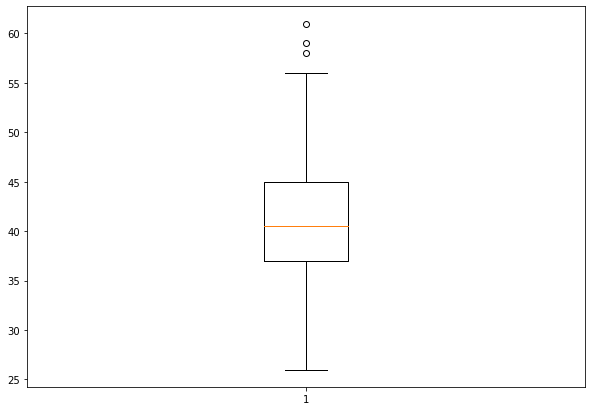

In [104]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(degree_matrix)
 
# show plot
plt.show()

We predict Graph A to be a Stochastic Block Model graph because of the higher max and lower min values paired with higher standard deviation observed from the degree matrix - as compared to a random graph. This shows that there likely exists inter and intra community biases that a random graph will not have. We have also verified using the function connected_components from scipy.sparse.csgraph that this graph does not have two connected components. The most natural choice therefore is to conclude that Graph A is a Stochastic Block Model Graph.

# Graph B is the Completely Random Graph

Reformatting the matrices to a list representation

In [10]:
row_matrix = []
with open('B.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        row_matrix.append(row)
        
m = row_matrix[0][0].split(',')

num_rows = len(row_matrix)
num_cols = len(m)

#print(type(m[0]))

adj_matrix = []
for i in range(num_rows) :
    m = row_matrix[i][0].split(',')
    temp = []
    for j in range(num_cols) :
        temp.append(int(m[j]))
    adj_matrix.append(temp)
    
#print(adj_matrix)

Display the Largest and Second Largest Eigenvalue

In [11]:
w, v = LA.eig(np.array(adj_matrix))
print(np.sort(w))

[-1.02772029e+01 -9.87824556e+00 -9.83929534e+00 -9.50446882e+00
 -9.41215649e+00 -9.22558410e+00 -9.04451436e+00 -8.81422917e+00
 -8.73487660e+00 -8.64814165e+00 -8.29629495e+00 -8.26465800e+00
 -8.14739202e+00 -8.07171792e+00 -7.92080959e+00 -7.77867881e+00
 -7.63290226e+00 -7.53542285e+00 -7.47481495e+00 -7.33825592e+00
 -7.19673906e+00 -7.17977268e+00 -7.00783648e+00 -6.97040987e+00
 -6.84972977e+00 -6.72193233e+00 -6.58315663e+00 -6.42492065e+00
 -6.31518194e+00 -6.29041366e+00 -6.10193054e+00 -6.05647060e+00
 -5.92832716e+00 -5.74483442e+00 -5.69857944e+00 -5.65316440e+00
 -5.56731063e+00 -5.41502224e+00 -5.35527304e+00 -5.27017343e+00
 -5.18235060e+00 -4.96472584e+00 -4.84040000e+00 -4.82678047e+00
 -4.65276988e+00 -4.63383515e+00 -4.50435066e+00 -4.41687332e+00
 -4.34868006e+00 -4.25188849e+00 -4.23042905e+00 -4.01037203e+00
 -3.82889480e+00 -3.81709153e+00 -3.69397577e+00 -3.64922288e+00
 -3.54214411e+00 -3.45274609e+00 -3.40045984e+00 -3.15234167e+00
 -3.10942355e+00 -3.09872

Notice for Random Graph that we need further analysis to verify it's identity.

In [106]:
print(connected_components(np.asarray(adj_matrix)))

(1, array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32))


Use a degree matrix and data analysis to determine the identity

In [107]:
degree_matrix = []
for i in range(num_rows) :
    m = row_matrix[i][0].split(',')
    temp = 0
    for j in range(num_cols) :
        temp = temp + int(m[j])
    degree_matrix.append(temp)

print(degree_matrix)
print('Average Degree')
print(sum(degree_matrix) / len(degree_matrix))
print('Maximum Degree') 
print(max(degree_matrix))
print('Minimum Degree')
print(min(degree_matrix))
print('IQR')
q3, q1 = np.percentile(degree_matrix, [75 ,25])
print(q3 - q1)
print('Standard Deviation')
print(statistics.pstdev(degree_matrix))

[45, 42, 38, 43, 46, 41, 48, 30, 46, 42, 37, 43, 35, 39, 32, 52, 44, 38, 36, 44, 32, 34, 38, 46, 36, 34, 40, 38, 42, 39, 48, 34, 47, 32, 37, 33, 48, 43, 44, 48, 36, 33, 47, 32, 33, 39, 38, 45, 47, 50, 46, 36, 41, 42, 38, 49, 39, 38, 58, 44, 36, 43, 45, 47, 35, 46, 49, 38, 43, 38, 40, 43, 38, 38, 39, 40, 51, 32, 46, 52, 47, 50, 42, 47, 39, 48, 41, 36, 49, 34, 42, 37, 37, 35, 42, 35, 35, 34, 42, 31, 42, 38, 29, 40, 49, 39, 33, 36, 43, 48, 44, 48, 41, 38, 42, 39, 41, 41, 39, 37, 34, 34, 32, 32, 53, 40, 44, 49, 42, 49, 34, 53, 41, 45, 33, 48, 46, 40, 41, 41, 44, 31, 37, 43, 44, 42, 35, 38, 49, 37, 45, 38, 43, 38, 48, 27, 35, 41, 47, 38, 41, 44, 44, 38, 38, 42, 38, 38, 40, 43, 45, 39, 39, 40, 44, 37, 44, 52, 43, 46, 47, 36, 34, 35, 46, 45, 50, 36, 42, 42, 44, 36, 41, 36, 42, 38, 39, 48, 41, 38]
Average Degree
40.88
Maximum Degree
58
Minimum Degree
27
IQR
8.0
Standard Deviation
5.460366288079949


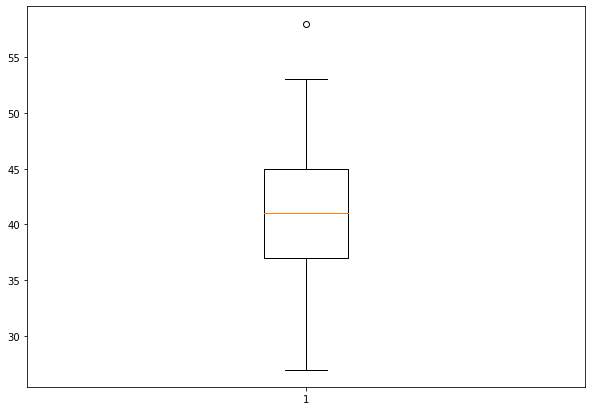

In [108]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(degree_matrix)
 
# show plot
plt.show()

We predict Graph B to be a Random graph because of the lower max and higher min values paired with lower standard deviation observed from the degree matrix - as compared to a Stochastic Block Model graph. This shows that there likely does not exist inter and intra community biases that a SBM will have. All the edges are likely generated evenly using the probability given. We have also verified using the function connected_components from scipy.sparse.csgraph that this graph does not have two connected components. The most natural choice therefore is to conclude that Graph B is a Random Graph.

# Graph C is the Graph with Two Connected Components

Reformatting the matrices to a list representation

In [12]:
row_matrix = []
with open('C.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        row_matrix.append(row)
        
m = row_matrix[0][0].split(',')

num_rows = len(row_matrix)
num_cols = len(m)

#print(type(m[0]))

adj_matrix = []
for i in range(num_rows) :
    m = row_matrix[i][0].split(',')
    temp = []
    for j in range(num_cols) :
        temp.append(int(m[j]))
    adj_matrix.append(temp)
    
#print(len(adj_matrix[1]))

Display the Largest and Second Largest Eigenvalue

In [13]:
w, v = LA.eig(np.array(adj_matrix))
print(np.sort(w))

[-9.18666451 -9.08691509 -8.43096794 -8.41407739 -8.23030228 -8.18085866
 -8.03684494 -7.82258944 -7.78265924 -7.6614387  -7.45722026 -7.25047426
 -7.15354155 -7.07839406 -6.88357372 -6.85912159 -6.67004106 -6.53659237
 -6.52144785 -6.47289586 -6.24038271 -6.16574624 -6.15679554 -6.03925855
 -6.00558369 -5.79565182 -5.69256304 -5.61110503 -5.48616069 -5.45221535
 -5.2869274  -5.25368503 -5.13069335 -5.09106389 -4.97578226 -4.95918136
 -4.7788159  -4.75090125 -4.66093429 -4.52037573 -4.48746584 -4.3672096
 -4.31728493 -4.29834173 -4.12452316 -4.04160995 -4.01964905 -3.99485778
 -3.96734266 -3.884205   -3.6639957  -3.59043363 -3.5666016  -3.46245507
 -3.34230843 -3.32477077 -3.17319228 -3.014429   -2.9613291  -2.91589919
 -2.73796266 -2.70071054 -2.61235326 -2.59778877 -2.5029337  -2.36995876
 -2.32113468 -2.28961616 -2.17195797 -2.16431583 -1.94709199 -1.93270648
 -1.83211546 -1.78835555 -1.68085239 -1.50707828 -1.4594727  -1.45299043
 -1.27942791 -1.21172353 -1.18054742 -1.14282921 -1.

Notice for Two Connected Component Graph that we do not need further analysis to verify it's identity.

In [53]:
print(connected_components(np.asarray(adj_matrix)))

(2, array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0], dtype=int32))


Based on the conclusion of connected_components from scipy.sparse.csgraph we determine that Graph C is Two Connected Components.